In [1]:
#%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import scipy as sc
import scipy.stats as stats

# Encuentra el espectro de potencias en 1d, 2d y 3d para la función de correlación.

$$\xi(r)=\left(\frac{r}{r_0}\right)^{-\gamma}$$



# Calcula el espectro de potencias para las distribuciones que realizaste en el ejercicio 2 (punto 1), usando la derivación que vimos en clase

$$\hat{P}(\mathbf{k})=V\left | \frac{1}{N}\sum_{i=gal}^N e^{i \mathbf{k\cdot x}}\right |^2 -\frac{V}{N}$$


In [3]:
L = 1000 #tamaño de la caja

a) puntos en una malla cuadriculada de distancia (10x10 cada retícula)


In [4]:
"""parámetros"""
a = 50 #tamaño de los pasos
N = 10 #no. partículas

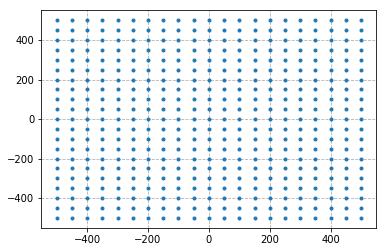

In [22]:
#vamosa centrar la malla

dx = L/20
mgrid = np.lib.index_tricks.nd_grid()
malla_x, malla_y = mgrid[ 0:L+dx:dx, 0:L+dx:dx ]
malla_x = malla_x.flatten() - L/2
malla_y = malla_y.flatten() - L/2

plt.plot(malla_x,malla_y,'.');
plt.grid(linestyle = '--')

b) 1000 puntos sobre un disco de radio 300

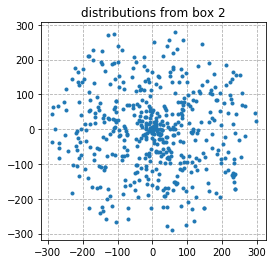

In [23]:
#definimos la ecuación de un círculo
N = 500
R = 300*np.random.rand(N) #Radio random

rng = 2*np.pi*np.random.rand(N) #ángulo random
x1 = R*np.cos(rng)
x2 = R*np.sin(rng)

plt.plot(x1,x2,'.')
plt.axis('scaled');
plt.title('distributions from box 2')
plt.grid(linestyle = '--')
plt.show()

c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

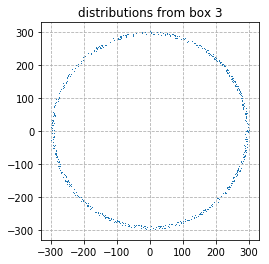

In [27]:
N = 600
delta = 10 #ancho del anillo
r2 = 290 + np.random.rand(N)*delta
rng = 2*np.pi*np.random.rand(N) #ángulo random
ych = r2*np.cos(rng)
y2ch =r2*np.sin(rng)

plt.plot(ych,y2ch,',')
plt.title('distributions from box 3')
plt.axis('scaled');
plt.grid(linestyle = '--')

d) 50 anillos con 100 untos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

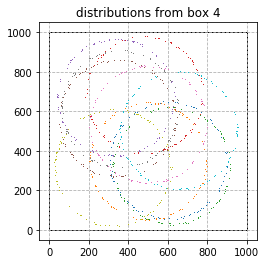

In [39]:
n = 10 #no. anillos
N1 = 100 #nuevo no. de partículas

plt.axes()
box2d = plt.Rectangle((0,0),L,L , fc = 'white', ec = 'k')
plt.gca().add_patch(box2d)
plt.axis('scaled')

dataxc4 = np.zeros((n,N1))
datayc4 = np.zeros((n,N1))

for i in range(n):
    
        ang = 2*np.pi*np.random.rand(N1) #ángulo random

        radio = 290 + np.random.rand(N1)*delta

        centrox = np.random.rand()*(L - 2*300) + 300 #centros aleatorios
        centroy = np.random.rand()*(L - 2*300) + 300

        xrings = radio*np.cos(ang) + centrox 
        yrings =radio*np.sin(ang) + centroy 
        
        dataxc4[i] = dataxc4[i] + xrings
        datayc4[i] = datayc4[i] + yrings
        
        plt.plot(xrings,yrings,',')
        plt.title('distributions from box 4')
        plt.axis('scaled');
        plt.grid(linestyle = '--')
    

# a) Determina un rango en $k$ y usa 20-100 bins en $kx$ y $ky$.



In [30]:
#Parte de la sumatoria
def P_sum(x,y,k_x,k_y):
    p = 0
    for i in range(len(x)):
        p = p + np.exp(1j*(k_x*x[i]+k_y*y[i]))
    return p

In [47]:
#Espectro de potencias
def Espectro_pot(x,y,bins,Vol):
    x = x.flatten()
    y = y.flatten()
    N = len(x)
    dk = (2*pi)/bins
    k = np.arange(0, 2*pi, dk)
    P_k = np.zeros(bins)
    for i in range(bins):
        P_k[i] = (Vol/(N**2)) * abs(P_sum(x, y, k[i], k[0]))**2 - (Vol/N)
    
    plt.plot(k,P_k, color = 'indianred');
    plt.title('Espectro de potencias')
    return P_k

In [48]:
bins = 1000
V = L*L

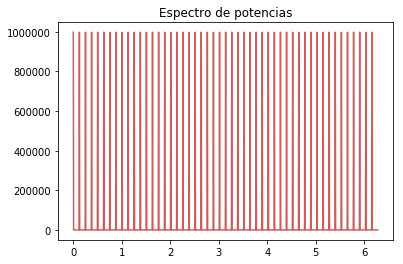

In [49]:
#Caja 1: malla
Pc1 = Espectro_pot(malla_x, malla_y, bins, V)
#plt.xlim(0, 100)
#plt.ylim(0, 100)

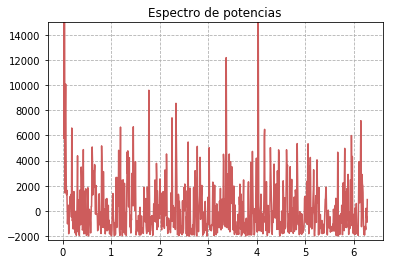

In [50]:
#Caja 2: esfera
Pc2 = Espectro_pot(x1, x2, bins, V)
#plt.xlim(0, 100)
plt.ylim(-2300, 15000)
plt.grid(linestyle = '--')

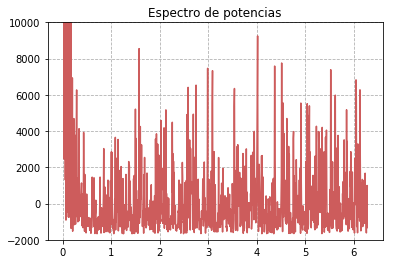

In [83]:
#Caja 3: anillo
Pc3 = Espectro_pot(ych, y2ch, 1000, V)
#plt.xlim(0, 100)
plt.ylim(-2000, 10000)
plt.grid(linestyle = '--')

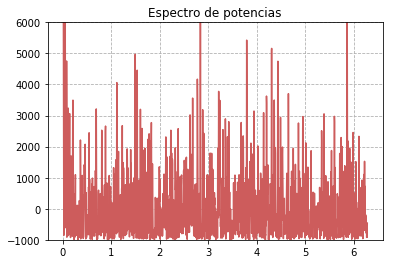

In [90]:
#Caja 4: anillos
Pc4 = Espectro_pot(dataxc4, datayc4, 2000, V)
#plt.xlim(0, 100)
plt.ylim(-1000, 6000)
plt.grid(linestyle = '--')

# b) Obten la transformada de Fourier de estos espectros y comparas con las funciones de correlación que obtuviste en el ejercicio 2. Ajusta el rango en $k$ y sus bins para ver si la transformada de Fourier de inciso b) se acerca más a la función de correlación.

In [57]:
#caja 1: malla
fftc1 = sc.fft(Pc1)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


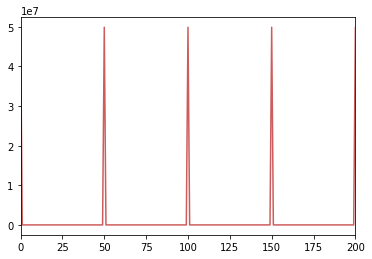

In [59]:
plt.plot(fftc1, color = 'indianred')
plt.xlim(0, 200);
plt.grid(linestyle = '--')

In [60]:
#caja 2: esfera
fftc2 = sc.fft(Pc2)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


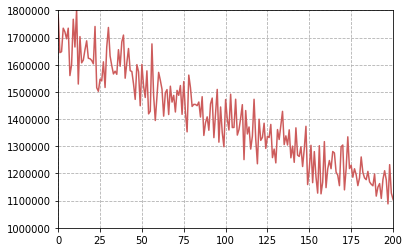

In [64]:
plt.plot(fftc2, color = 'indianred')
plt.xlim(0, 200);
plt.ylim(1000000, 1800000)
plt.grid(linestyle = '--')

In [84]:
#caja 3: anillo
fftc3 = sc.fft(Pc3)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


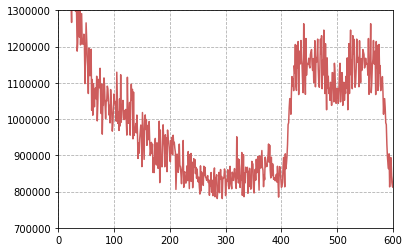

In [86]:
plt.plot(fftc3, color = 'indianred')
plt.xlim(0, 600);
plt.ylim(700000, 1300000)
plt.grid(linestyle = '--')

In [91]:
#caja 4: anillos
fftc4 = sc.fft(Pc4)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


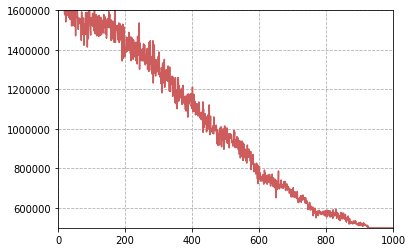

In [95]:
plt.plot(fftc4, color = 'indianred')
plt.xlim(0, 1000);
plt.ylim(500000, 1600000)
plt.grid(linestyle = '--')